In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import networkx as nx

In [90]:
data = pd.read_csv('../data/train_peptides.csv')

In [91]:

# Create two sets of nodes for peptides and proteins
peptide_nodes = set(data['Peptide'])
protein_nodes = set(data['UniProt'])

# Create a bipartite graph
G = nx.Graph()

# Add the peptide nodes to the graph
G.add_nodes_from(peptide_nodes, bipartite=0)

# Add the protein nodes to the graph
G.add_nodes_from(protein_nodes, bipartite=1)

# Iterate through the interactions and add edges to the graph
for index, row in data.iterrows():
    peptide = row['Peptide']
    protein = row['UniProt']
    interaction_score = row['PeptideAbundance']
    G.add_edge(peptide, protein, weight=interaction_score)
    G.add_edge(peptide, protein)

# Save the graph as a GraphML file
nx.write_graphml(G, 'AMP_Parkinsons_Protein_Peptide.graphml')



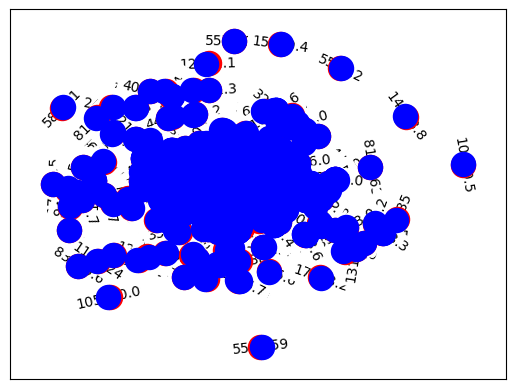

In [92]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=protein_nodes, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=peptide_nodes, node_color='b')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})
plt.show()

In [94]:
# Identify the set of peptides and the set of proteins
peptides = set(node for node in G.nodes() if G.nodes[node]['bipartite'] == 0)
proteins = set(node for node in G.nodes() if G.nodes[node]['bipartite'] == 1)

# Count the number of proteins each peptide is connected to
peptide_counts = {}
for peptide in peptides:
    peptide_counts[peptide] = len(list(G.neighbors(peptide)))

# Extract the list of peptides that are connected to more than one protein
multi_protein_peptides = [peptide for peptide, count in peptide_counts.items() if count > 1]

# Print the list of peptides that are used to construct more than one protein
print('Peptides used to construct more than one protein:', multi_protein_peptides)

Peptides used to construct more than one protein: []


In [95]:
# Identify hub proteins
proteins = set(node for node in G.nodes() if G.nodes[node]['bipartite'] == 1)
degree_dict = dict(G.degree(proteins))
hub_proteins = [protein for protein, degree in degree_dict.items() if degree > 1]
print('Hub proteins:', hub_proteins)

Hub proteins: ['P41222', 'P02749', 'P05546', 'Q16270', 'P00441', 'Q08380', 'P07711', 'Q13740', 'P39060', 'P13611', 'O15240', 'P02753', 'P05156', 'P54289', 'P05067', 'P10909', 'O00584', 'P05060', 'P01877', 'P02675', 'P13591', 'P04433', 'P01860', 'P10643', 'Q16610', 'Q06481', 'P06681', 'P02647', 'P16870', 'P02774', 'P02452', 'P17174', 'P36955', 'P08493', 'P43121', 'P02679', 'P04075', 'P07602', 'P01019', 'Q12805', 'P00748', 'P08697', 'P16035', 'P00751', 'P02748', 'P07225', 'P09871', 'Q92520', 'P08294', 'P43652', 'P05155', 'Q9UHG2', 'P51884', 'P00736', 'P27169', 'P55290', 'P06396', 'P05090', 'P02765', 'P07998', 'P02787', 'P04217', 'P05452', 'O14773', 'P13987', 'P14618', 'P02656', 'P07339', 'P61769', 'P01011', 'P02649', 'P00450', 'P04180', 'P18065', 'P01859', 'P02747', 'P20774', 'Q92876', 'P01009', 'P00734', 'P24592', 'Q9NQ79', 'P36222', 'Q9UBX5', 'P00747', 'P12109', 'P09486', 'P01034', 'P23142', 'P01857', 'P61916', 'Q96KN2', 'P02652', 'P02671', 'P08603', 'Q14118', 'P16070', 'P01024', 'P198

In [96]:
# Identify overlapping peptides
peptides = set(node for node in G.nodes() if G.nodes[node]['bipartite'] == 0)
overlapping_peptides = []
for peptide in peptides:
    neighbors = list(G.neighbors(peptide))
    if len(neighbors) > 1:
        overlapping_peptides.append(peptide)
print('Overlapping peptides:', overlapping_peptides)

Overlapping peptides: []


In [98]:
G = nx.read_graphml('AMP_Parkinsons_Protein_Peptide.graphml')

# Perform operations on the graph, e.g. computing centrality measures
centrality = nx.betweenness_centrality(G)

# Find shortest path between a peptide and a protein
shortest_path = nx.shortest_path(G, source='IEIPSSVQQVPTIIK', target='VIAVNEVGR')
print("Shortest path:", " -> ".join(shortest_path))

# Find all paths between a peptide and a protein
all_paths = nx.all_simple_paths(G, source='IEIPSSVQQVPTIIK', target='VIAVNEVGR', cutoff=4)
for path in all_paths:
    print("Path:", " -> ".join(path))

centrality

Shortest path: IEIPSSVQQVPTIIK -> O00533 -> VIAVNEVGR
Path: IEIPSSVQQVPTIIK -> O00533 -> VIAVNEVGR


{'NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK': 0.0,
 'NFPSPVDAAFR': 0.0,
 'KC(UniMod_4)C(UniMod_4)VEC(UniMod_4)PPC(UniMod_4)PAPPVAGPSVFLFPPKPK': 0.0,
 'TSTDLQVLAAR': 0.0,
 'EIVMTQSPATLSVSPGER': 0.0,
 'LKDDEVAQLKK': 0.0,
 'FQNALLVR': 0.0,
 'AIGAVPLIQGEYMIPC(UniMod_4)EK': 0.0,
 'RVDTVDPPYPR': 0.0,
 'ILGPLSYSK': 0.0,
 'DQPFTILYR': 0.0,
 'KLINDYVK': 0.0,
 'TYLGNALVC(UniMod_4)TC(UniMod_4)YGGSR': 0.0,
 'SIAQYWLGC(UniMod_4)PAPGHL': 0.0,
 'SGEATDGARPQALPEPMQESK': 0.0,
 'DC(UniMod_4)HLAQVPSHTVVAR': 0.0,
 'INENTGSVSVTR': 0.0,
 'VEHSDLSFSK': 0.0,
 'DASGVTFTWTPSSGK': 0.0,
 'HLSLLTTLSNR': 0.0,
 'AVVFLEPQWYR': 0.0,
 'IEEELGDEAR': 0.0,
 'HQPQEFPTYVEPTNDEIC(UniMod_4)EAFRKDPK': 0.0,
 'C(UniMod_4)TTPPPSSGPTYQC(UniMod_4)LK': 0.0,
 'LATVGELQAAWR': 0.0,
 'QAPGQGLEWMGR': 0.0,
 'LVYPSC(UniMod_4)EEK': 0.0,
 'FSEEAC(UniMod_4)AVLTSPTFEAC(UniMod_4)HR': 0.0,
 'VFAVSHGR': 0.0,
 'FIYGGC(UniMod_4)GGNR': 0.0,
 'GAYPLSIEPIGVR': 0.0,
 'NEQEQPLGQWHLS': 0.0,
 'DKLAAC(UniMod_4)LEGNC(UniMod_4)AEGLGTNYR': 0.0,
 'LEPYADQLR': 0